# Linear Regression

Multiple linear regression of prices of used Ford cars. Dataset features include car model, year, transmission, mileage, fuel type, annual tax, miles per gallon (mpg), and engine size. This model attempts to predict the price of used cars using the features provided.

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns

### Import Dataset(s)

In [2]:
df = pd.read_csv('../data/ford.csv')

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [5]:
df.nunique()

model              24
year               23
price            3511
transmission        3
mileage         13528
fuelType            5
tax                36
mpg                90
engineSize         16
dtype: int64

### Exploratory Data Analysis

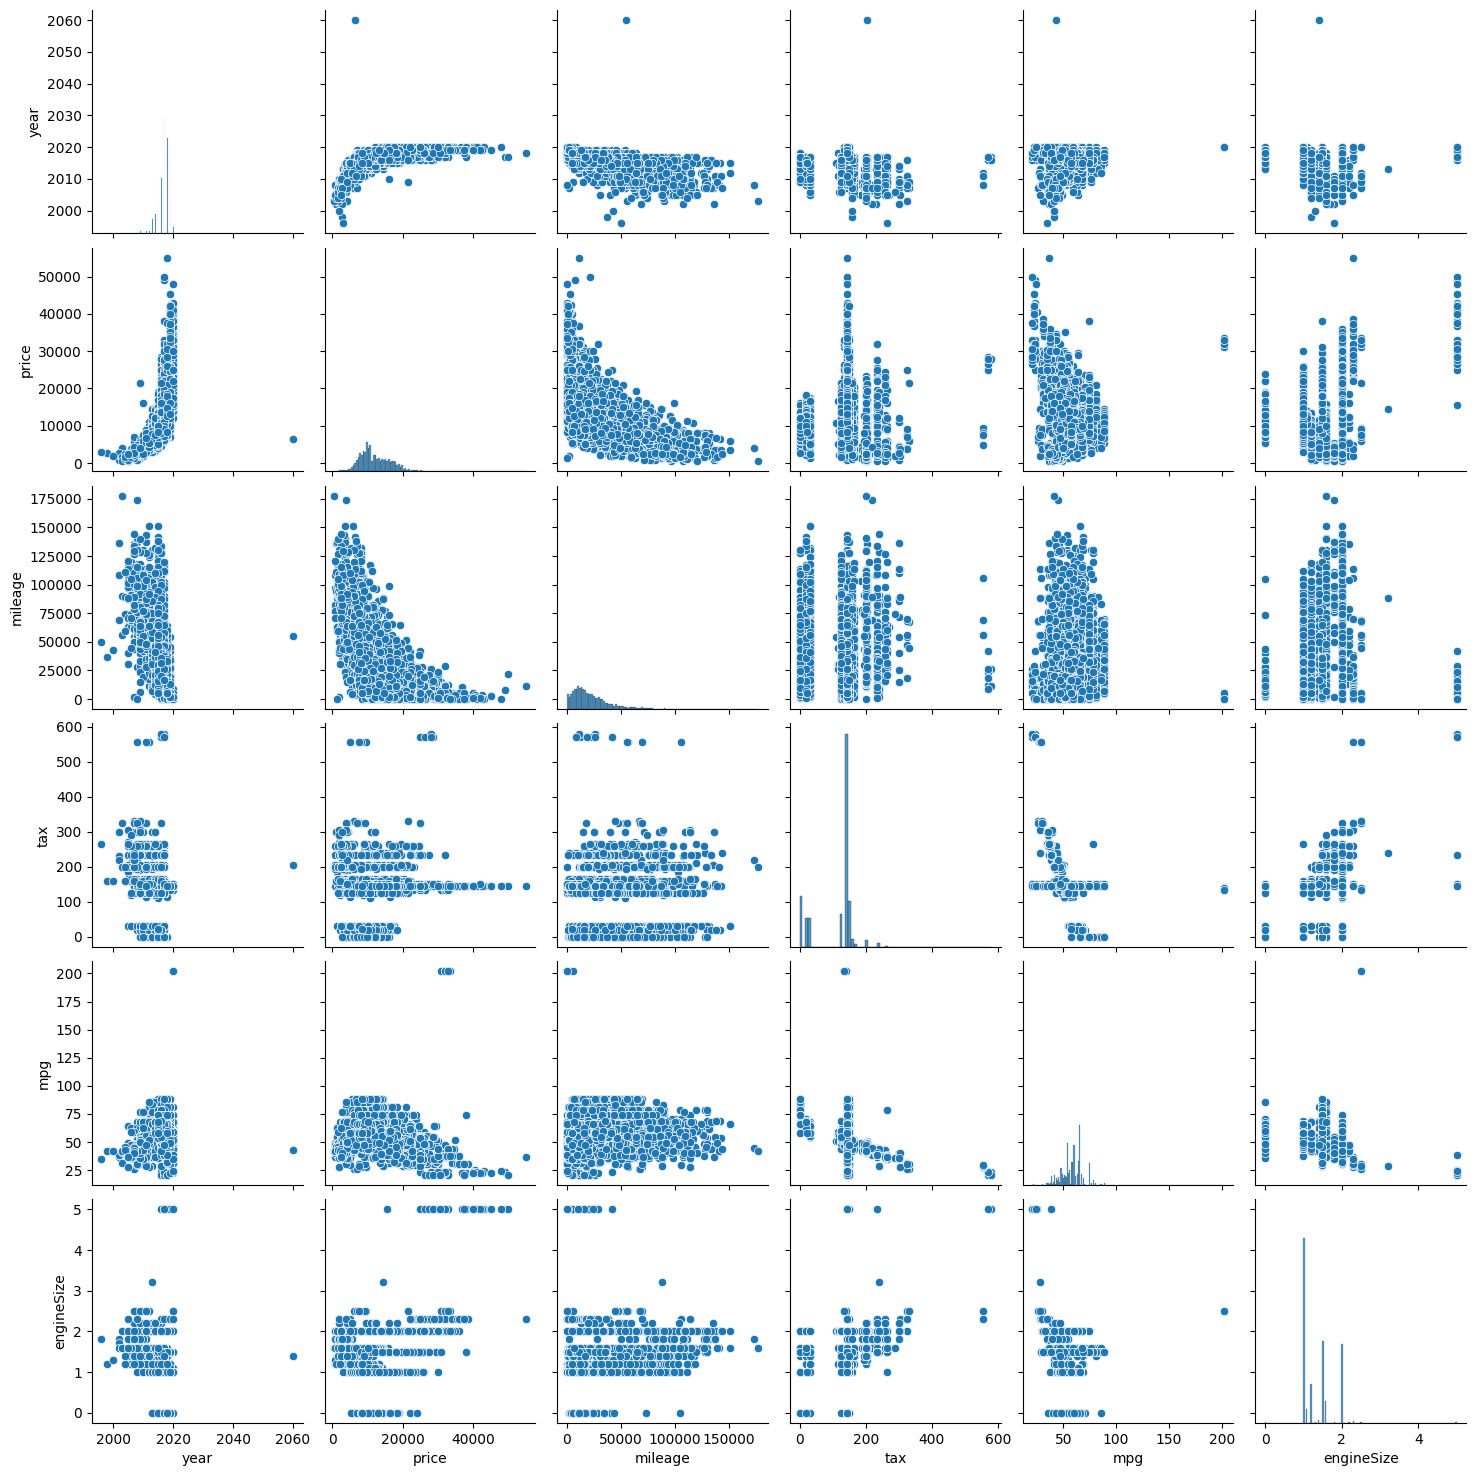

In [6]:
sns.pairplot(df)

The following outliers will be removed for containing unrealistic features.
- year > 2020
- mpg > 100

<Axes: xlabel='price', ylabel='Count'>

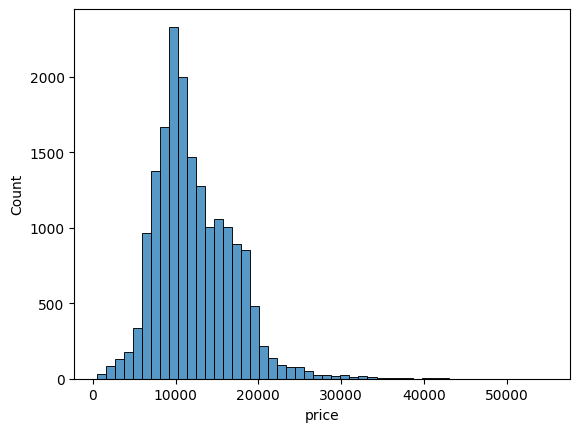

In [7]:
sns.histplot(df['price'],bins=50)

<Axes: xlabel='price', ylabel='model'>

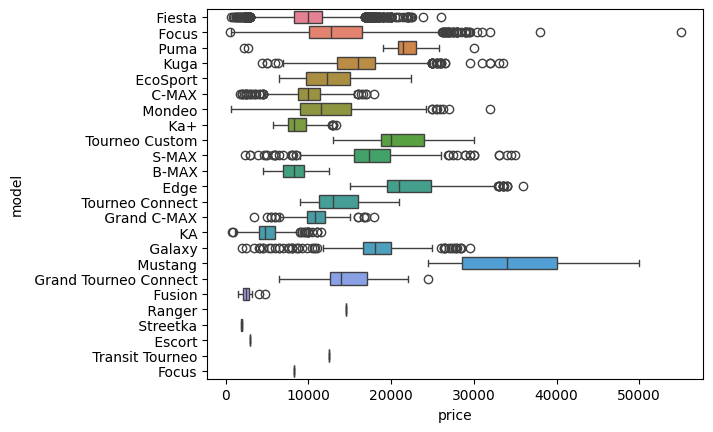

In [8]:
sns.boxplot(data=df,x='price',y='model',hue='model')

<Axes: xlabel='price', ylabel='transmission'>

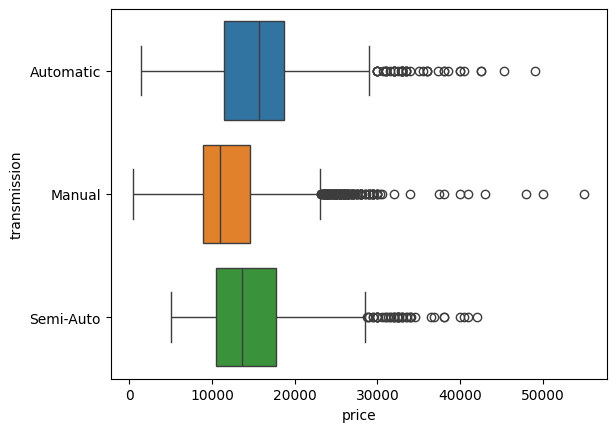

In [9]:
sns.boxplot(data=df,x='price',y='transmission',hue='transmission')

<Axes: xlabel='price', ylabel='fuelType'>

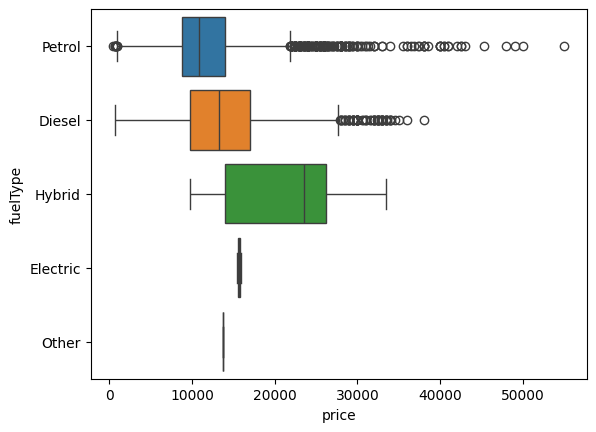

In [10]:
sns.boxplot(data=df,x='price',y='fuelType',hue='fuelType')

<Axes: xlabel='year', ylabel='price'>

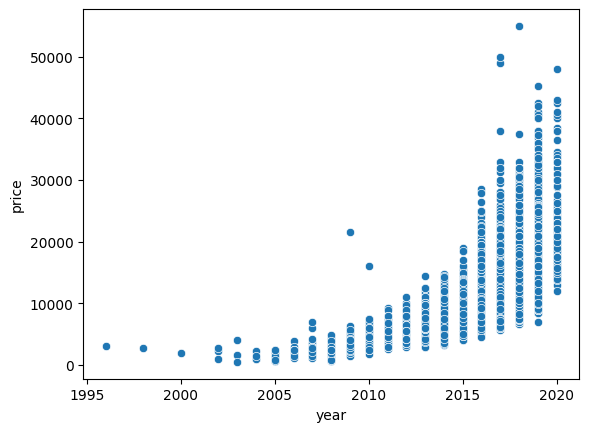

In [11]:
sns.scatterplot(data=df[df['year'] <= 2020],x='year',y='price')

<Axes: xlabel='mileage', ylabel='price'>

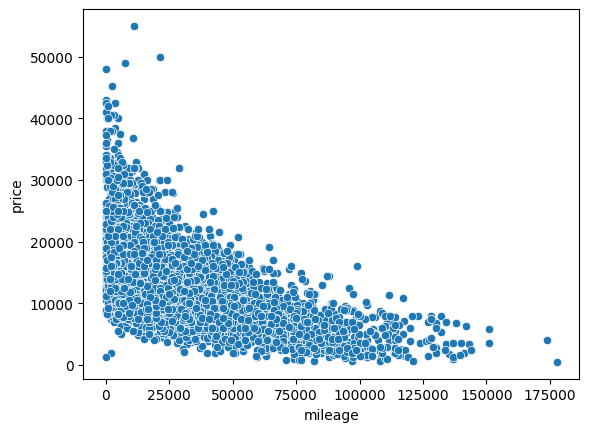

In [12]:
sns.scatterplot(data=df,x='mileage',y='price')

### Data Preprocessing

First, we want to remove all data points that either have 'year' greater than 2020, 'mpg' greater than 100, or both.

In [13]:
df = df[(df['year'] <= 2020) | (df['mpg'] <= 100)]

In [14]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


Transform the categorical features (model, transmission, fuelType) to binary.

In [15]:
df = pd.get_dummies(data=df, columns=['model','transmission','fuelType'], drop_first=True)

In [16]:
df.head()

,year,price,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57.7,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2018,14000,9083,150,57.7,1.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2017,13000,12456,150,57.7,1.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2019,17500,10460,145,40.3,1.5,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,2019,16500,1482,145,48.7,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [17]:
df.head()

,year,price,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57.7,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2018,14000,9083,150,57.7,1.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2017,13000,12456,150,57.7,1.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2019,17500,10460,145,40.3,1.5,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,2019,16500,1482,145,48.7,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


### Feature Engineering

In [18]:
X = df.drop('price',axis=1)
y = df['price']

In [19]:
X.head()

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,2018,9083,150,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2017,12456,150,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2019,10460,145,40.3,1.5,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
4,2019,1482,145,48.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [20]:
y.head()

0    12000
1    14000
2    13000
3    17500
4    16500
Name: price, dtype: int64

### Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

### Regression Model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(X_train, y_train)

LinearRegression()

In [26]:
pred = lm.predict(X_test)

### Metrics

In [27]:
err = pred - y_test

<Axes: xlabel='price', ylabel='Count'>

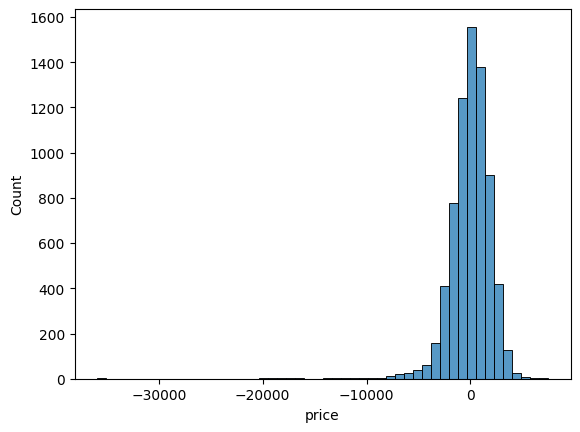

In [28]:
sns.histplot(err, bins=50)

Model predictions show several data points with significant error, while the majority of data points are distributed around 0.

In [29]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from math import sqrt

In [30]:
print("MAE:", mean_absolute_error(y_test, pred))
print("MAPE:", mean_absolute_percentage_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))
print("RMSE:", sqrt(mean_squared_error(y_test, pred)))

MAE: 1368.0816690525705
MAPE: 0.13194592692029056
MSE: 3625477.9240473467
RMSE: 1904.0687813331078
